In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plot
from matplotlib import rcParams 
from scipy.signal import medfilt
rcParams['figure.dpi'] = 120
from scipy import fftpack
from ipywidgets import interact, FloatSlider, IntSlider, SelectionSlider, Layout

def color2bw(img):
    return np.dot(img, [0.299, 0.587, 0.114])

# denoise

In [54]:
img_corrompida = color2bw(plt.imread('.images/example.png'))  # frame ya corrompido

In [55]:
img_filtro1 = medfilt(img_corrompida, 5) # Filtro sal y pimienta

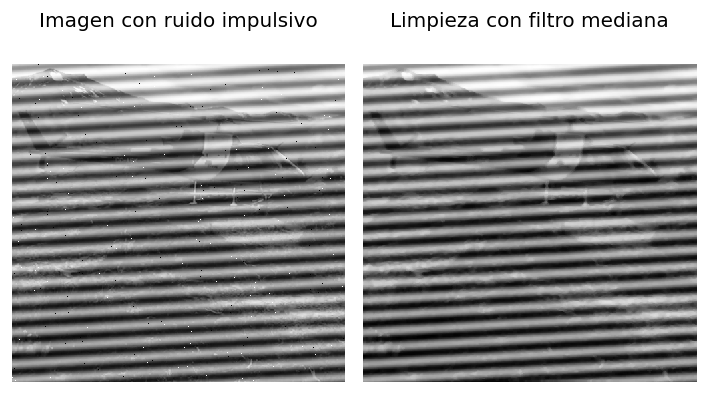

In [56]:
from scipy.signal import medfilt

fig, ax = plt.subplots(1, 2, figsize=(6, 3.5), tight_layout=True, sharex=True, sharey=True)
ax[0].matshow(img_corrompida[:, 100:600], cmap=plt.cm.Greys_r)     
ax[0].set_title('Imagen con ruido impulsivo')
ax[0].axis('off')
ax[1].matshow(img_filtro1[:, 100:600], cmap=plt.cm.Greys_r)
ax[1].set_title('Limpieza con filtro mediana')
ax[1].axis('off');

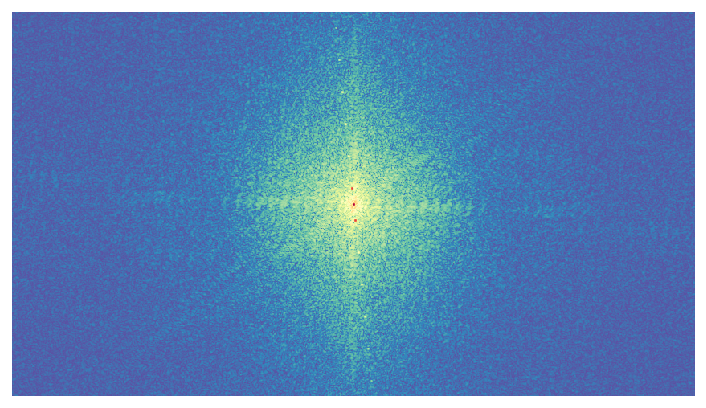

In [57]:
win = np.dot(np.hanning(img_filtro1.shape[0]).reshape(-1, 1), 
             np.hanning(img_filtro1.shape[1]).reshape(1, -1))

fig, ax = plt.subplots(figsize=(6, 3.5), tight_layout=True)
S_img = fftpack.fftshift(fftpack.fft2(img_filtro1*win))   
ax.matshow(np.log(np.absolute(S_img)+1), cmap=plt.cm.Spectral_r) 
ax.axis('off');

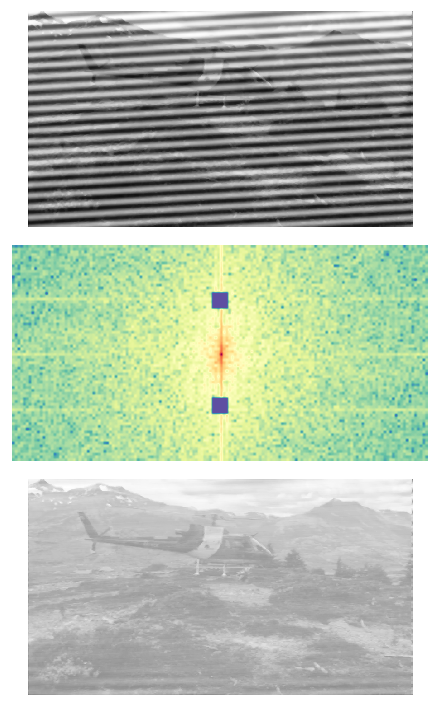

In [139]:
freq_x = fftpack.fftshift(fftpack.fftfreq(n=img_filtro1.shape[1]))
freq_y = fftpack.fftshift(fftpack.fftfreq(n=img_filtro1.shape[0]))

def create_mask(dims, frequency, size=1):
    freq_int = int(frequency*dims[0])
    mask = np.ones(shape=(dims[0], dims[1]))
    mask[dims[0]//2-size-freq_int:dims[0]//2+size-freq_int, 
         dims[1]//2-size:dims[1]//2+size] = 0 
    mask[dims[0]//2-size+freq_int:dims[0]//2+size+freq_int, 
          dims[1]//2-size:dims[1]//2+size] = 0
    return mask


S_img = fftpack.fftshift(fftpack.fft2(img_filtro1))
espectro_filtrado = S_img*create_mask(S_img.shape, 0.04, 3)   
# Reconstrucción
img_reconstructed = np.real(fftpack.ifft2(fftpack.ifftshift(espectro_filtrado)))

fig, ax = plt.subplots(3, 1, figsize=(10, 6), tight_layout=True)
ax[0].matshow(img_filtro1, cmap=plt.cm.Greys_r) 
ax[0].axis('off');
ax[1].imshow(np.log(1+np.abs(espectro_filtrado))[200:-200, 350:-350], cmap=plt.cm.Spectral_r)
ax[1].axis('off');
ax[2].matshow(img_reconstructed, cmap=plt.cm.Greys_r)
ax[2].axis('off');

# code